In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import random

city_hour = pd.read_csv('city_hour.csv')
station_hour = pd.read_csv('station_hour.csv')
station_day = pd.read_csv('station_day.csv')
city_day = pd.read_csv('city_day.csv')
stations = pd.read_csv('stations.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### CONVERTING TO A DATETIME OBJECT
#### Currently Date is an Object Type as we have seen during EDA, thus it must be converted to DateTime type.

In [3]:
city_day['Date'] = pd.to_datetime(city_day['Date'],dayfirst = True)
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'],dayfirst = True)

In [4]:
city_day['year'] = [x.year for x in city_day.Date] 
city_day['month'] = [x.strftime('%b') for x in city_day.Date] #Month as locale's full name.
city_hour['hours'] = [x.hour for x in city_hour.Datetime]

Multiple cell types have a ton of missing values that can't be removed as they are of importance thus we can fill in the values with the previous values with the help of bfill.

In [5]:
city_day.fillna(method='bfill',inplace=True)
city_hour.fillna(method='bfill',inplace=True)

In [6]:
city_day.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,2015,Jan
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,2015,Jan
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,2015,Jan
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,2015,Jan
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,2015,Jan
5,Ahmedabad,2015-01-06,73.24,141.54,45.41,38.48,81.50,26.64,45.41,45.76,46.51,5.42,10.83,1.93,209.0,Poor,2015,Jan
6,Ahmedabad,2015-01-07,73.24,141.54,112.16,40.62,130.77,26.64,112.16,32.28,33.47,0.00,0.00,0.00,209.0,Poor,2015,Jan
7,Ahmedabad,2015-01-08,73.24,141.54,80.87,36.74,96.75,26.64,80.87,38.54,31.89,0.00,0.00,0.00,209.0,Poor,2015,Jan
8,Ahmedabad,2015-01-09,73.24,141.54,29.16,31.00,48.00,26.64,29.16,58.68,25.75,0.00,0.00,0.00,209.0,Poor,2015,Jan
9,Ahmedabad,2015-01-10,73.24,141.54,132.07,7.04,0.00,26.64,132.07,8.29,4.55,0.00,0.00,0.00,209.0,Poor,2015,Jan


In [7]:
city_day.shape

(29531, 18)

In [8]:
city_day.isnull().sum() #why one values is still unfilled? maybe the 

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       1
Toluene       1
Xylene        1
AQI           0
AQI_Bucket    0
year          0
month         0
dtype: int64

CITY WISE PREDICTION OF AIR QUALITY 
1. AHMEDABAD
2. DELHI
3. GURUGRAM  
This is due to the fact that they have higher levels of pollution as compared to other cities in India

In [9]:
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']

In [10]:
colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn']

In [11]:
def lockdown_hourly_effect(city,value1,value2):
    city_df = city_hour[city_hour['City'] == city]
    fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi= 75)
    sns.pointplot(x='hours', y=value1, data=city_df,label = 'After Lockdown',color='red',ax=axes[0])
    sns.pointplot(x='hours', y=value2, data=city_df,label = 'After Lockdown',color='red',ax=axes[1])
    axes[0].set_title(city +' '+str(value1)+ ' Hourly Trend', fontsize=15); 
    axes[1].set_title(city +' '+str(value2)+ ' Hourly Trend', fontsize=15); 
    

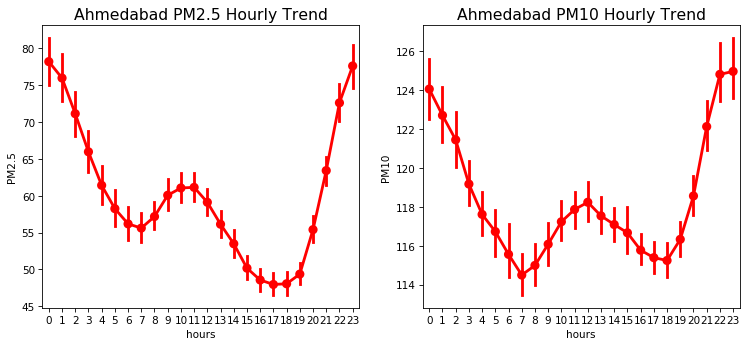

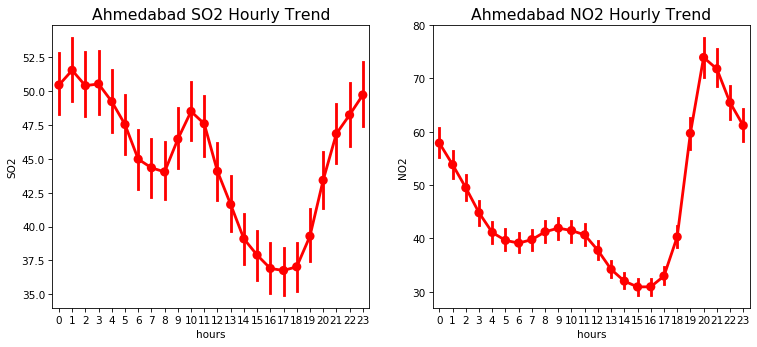

In [12]:
lockdown_hourly_effect('Ahmedabad','PM2.5','PM10')
lockdown_hourly_effect('Ahmedabad','SO2','NO2')

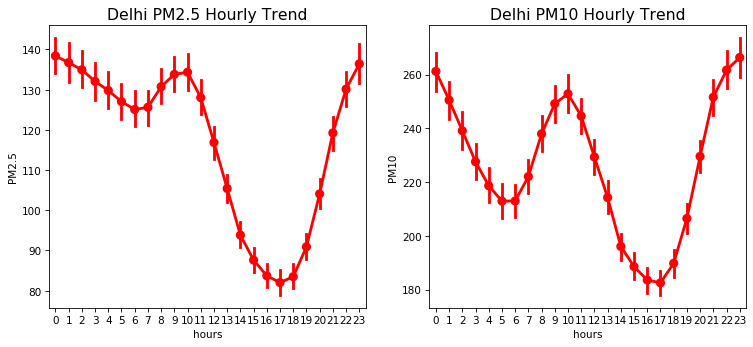

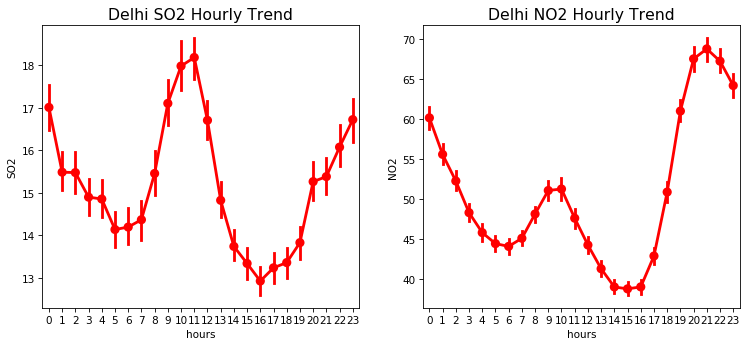

In [13]:
lockdown_hourly_effect('Delhi','PM2.5','PM10')
lockdown_hourly_effect('Delhi','SO2','NO2')

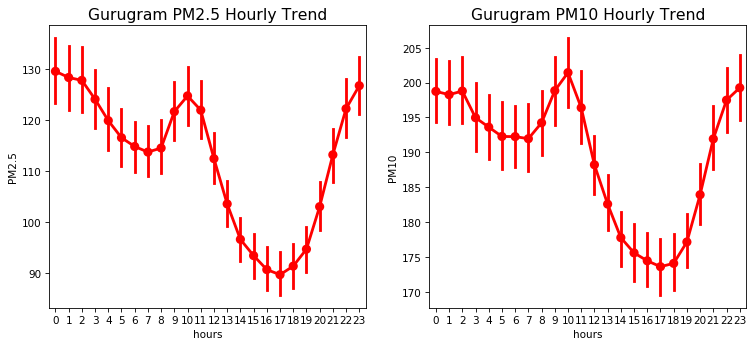

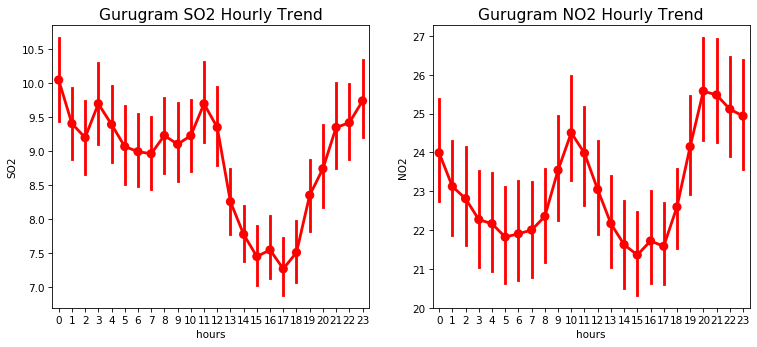

In [14]:
lockdown_hourly_effect('Gurugram','PM2.5','PM10')
lockdown_hourly_effect('Gurugram','SO2','NO2')

BUT WHAT TO DO WITH THIS INFO ABOVE ????

In [15]:
def lockdownEffect(city,value):
    df = city_day[city_day['Date'] > '3-1-2020']
    df = df[df['City'] == city]
    fig, ax1 = plt.subplots(figsize= (15,5));
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax1.set_ylabel(value)
    ax1.bar(df['Date'],df[value]);
    df = city_day[city_day['Date'] > '3-24-2020']
    df = df[df['City'] == city]
    ax1.bar(df['Date'],df[value],color='blue');
    plt.title('{} {}'.format(value, city))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


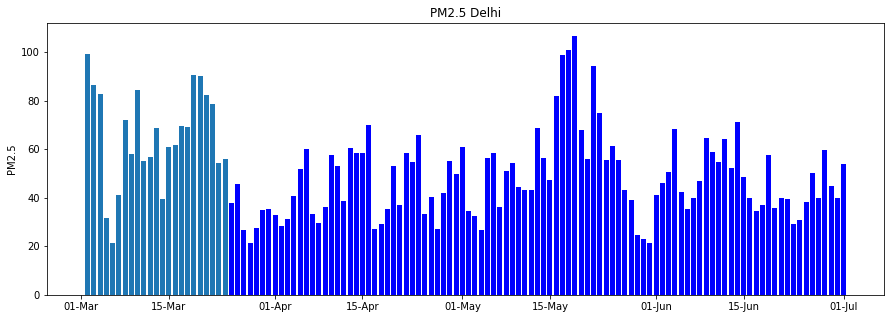

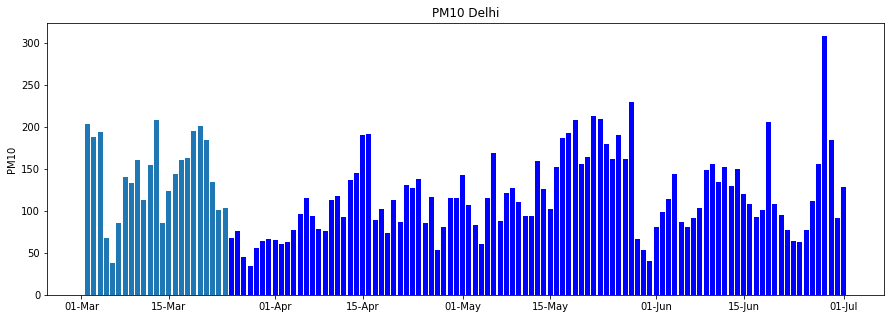

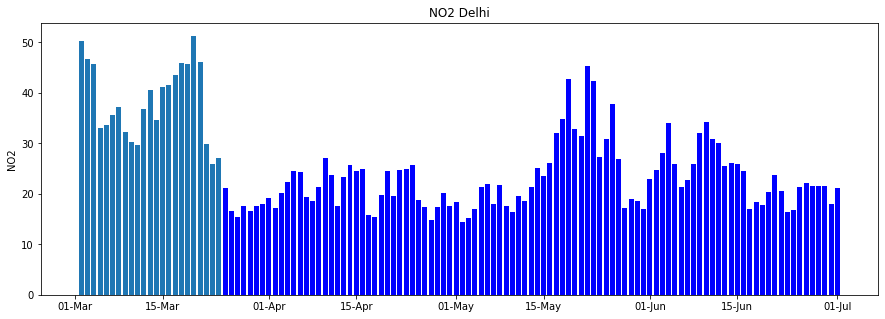

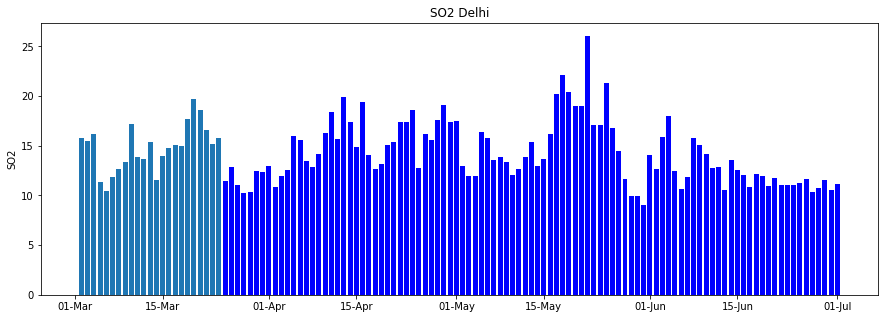

In [16]:
lockdownEffect('Delhi','PM2.5')
lockdownEffect('Delhi','PM10')
lockdownEffect('Delhi','NO2')
lockdownEffect('Delhi','SO2')

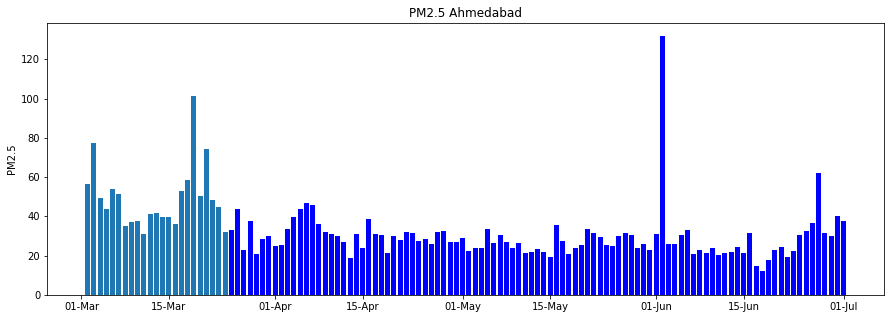

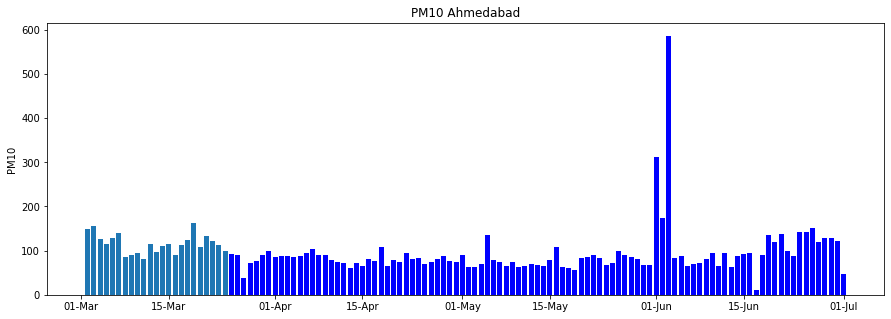

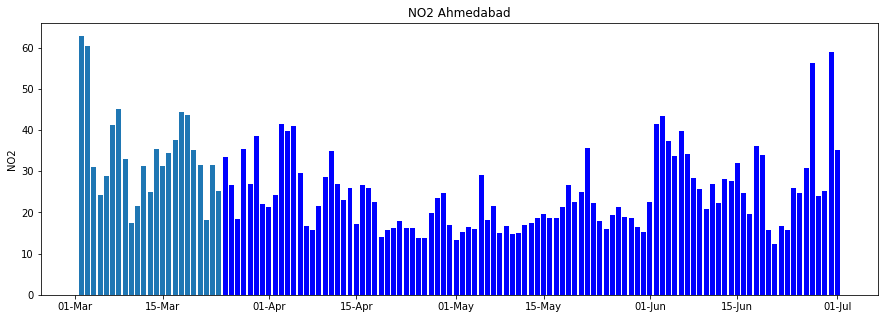

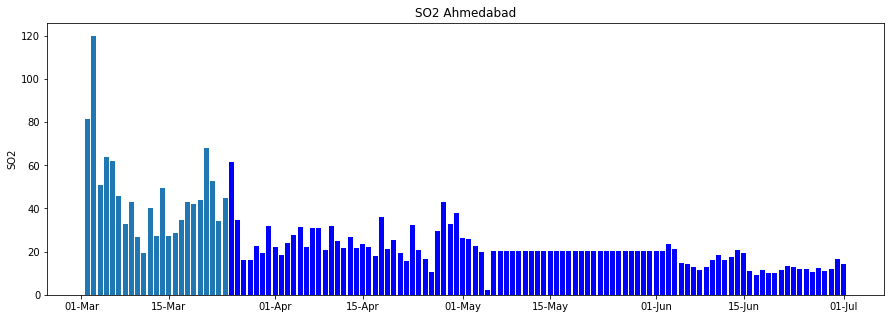

In [17]:
lockdownEffect('Ahmedabad','PM2.5')
lockdownEffect('Ahmedabad','PM10')
lockdownEffect('Ahmedabad','NO2')
lockdownEffect('Ahmedabad','SO2')

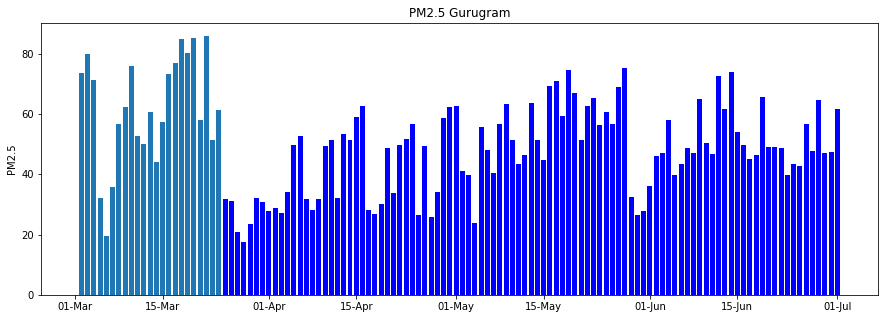

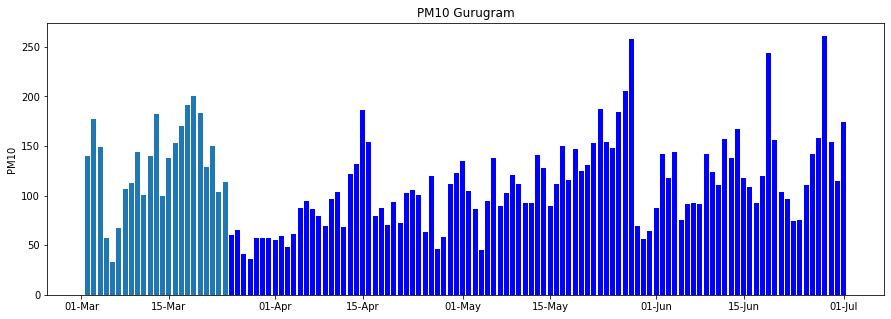

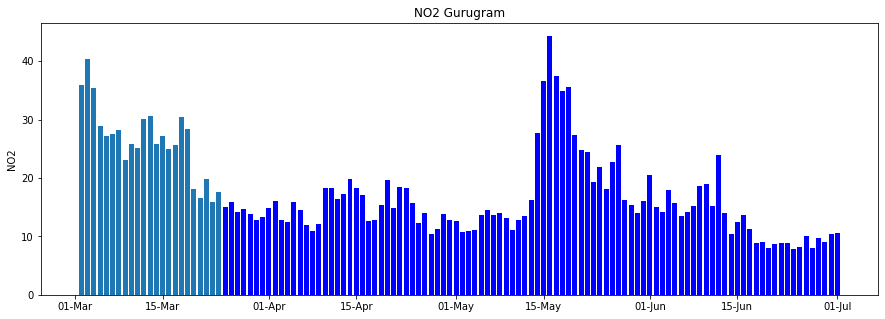

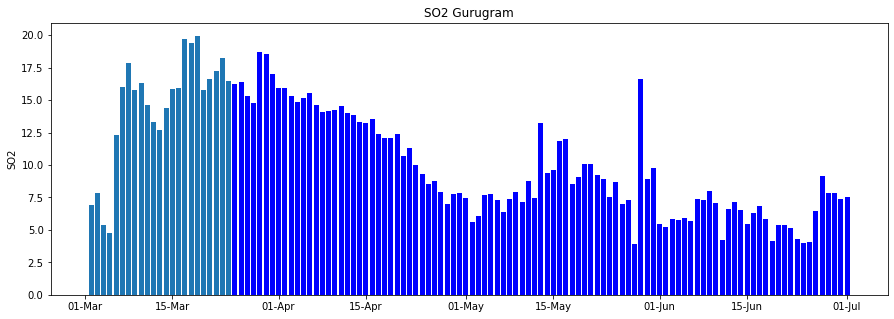

In [18]:
lockdownEffect('Gurugram','PM2.5')
lockdownEffect('Gurugram','PM10')
lockdownEffect('Gurugram','NO2')
lockdownEffect('Gurugram','SO2')